In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../sukkiri-ml-codes/datafiles/ex3.csv")

In [4]:
df.head(5)

,x0,x1,x2,x3,target
0,1.000943,2.114344,-1.148213,-0.051415,77.147293
1,1.505901,-0.626081,3.041686,-0.587336,278.595852
2,-0.390320,0.283607,-0.940359,-2.154124,-71.039904
3,-0.167273,1.413624,-0.632571,-1.016131,42.193870
4,-0.728801,1.370530,0.168298,-1.203904,89.167955


In [5]:
# 欠損値の有無の確認

df.isnull().any(axis=0)

x0         True
x1        False
x2         True
x3        False
target    False
dtype: bool

In [7]:
# 中央値で穴埋め

df2 = df.fillna(df.median())
df2.isnull().any(axis=0)

x0        False
x1        False
x2        False
x3        False
target    False
dtype: bool

<Axes: xlabel='x3', ylabel='target'>

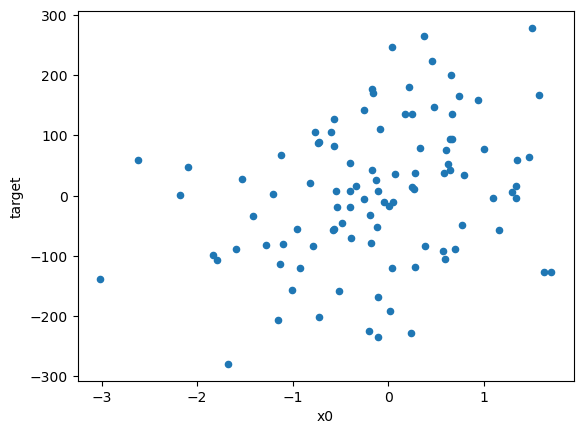

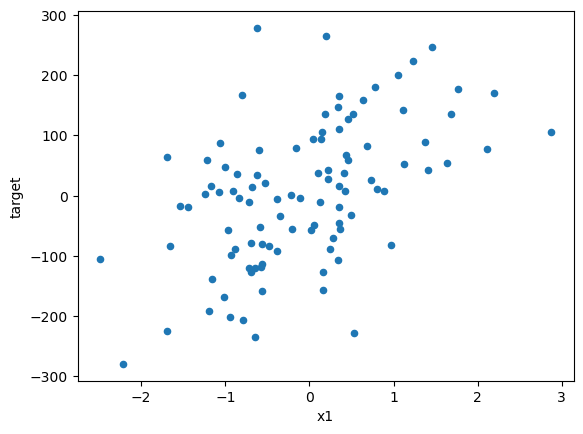

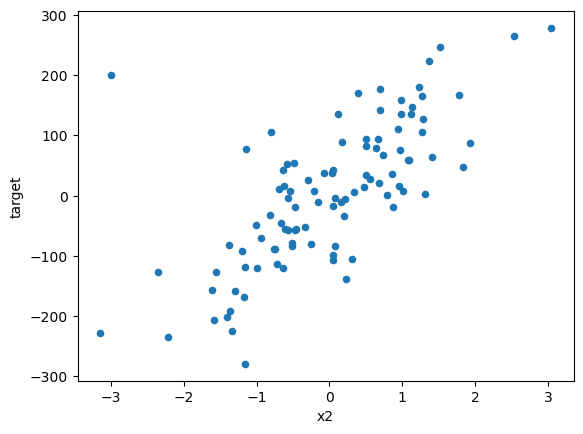

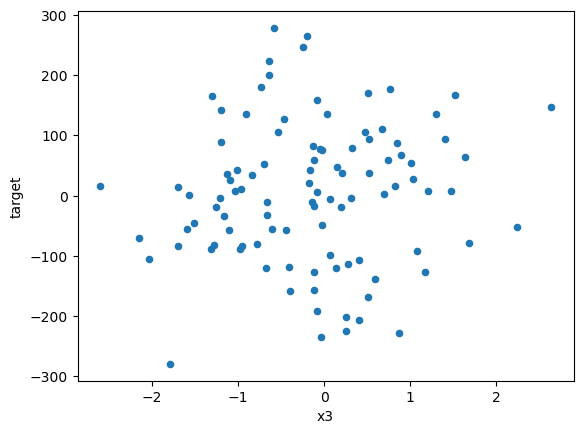

In [8]:
# 各特徴量とtargetの散布図を作成

%matplotlib inline

df2.plot(kind="scatter", x="x0", y="target")
df2.plot(kind="scatter", x="x1", y="target")
df2.plot(kind="scatter", x="x2", y="target")
df2.plot(kind="scatter", x="x3", y="target")

In [9]:
# 外れ値の除外

# x0の外れ値を除外
no_0 = df2[(df2["x0"] < -2.7) & (df2["target"] < -100)].index
df3_0 = df2.drop(no_0, axis=0)

# x2の外れ値を除外
no_2 = df2[(df2["x2"] < -2.7) & (df2["target"] > 100)].index
df3_2 = df3_0.drop(no_2, axis=0)

# x3の外れ値を除外
no_3 = df2[(df2["x3"] < -1.5) & (df2["target"] < -200)].index
df3_3 = df3_2.drop(no_3, axis=0)

<Axes: xlabel='x3', ylabel='target'>

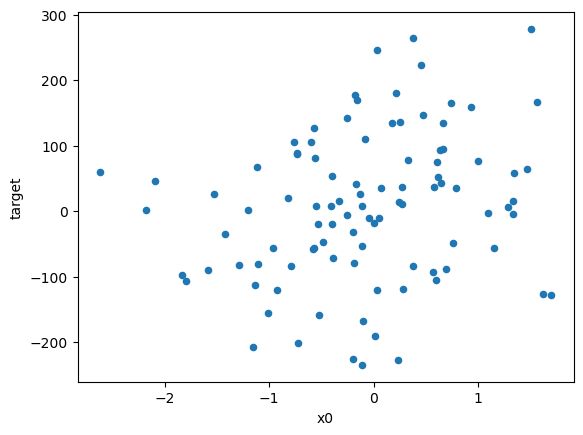

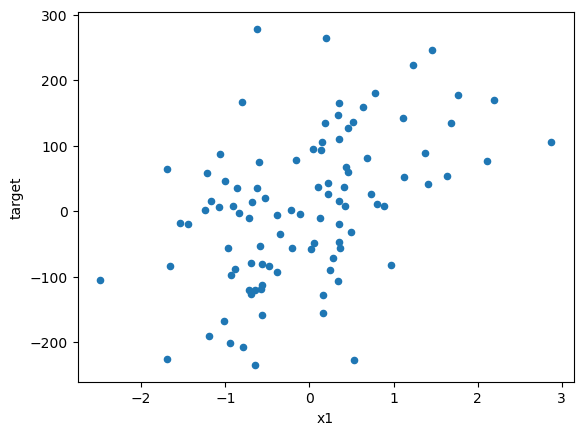

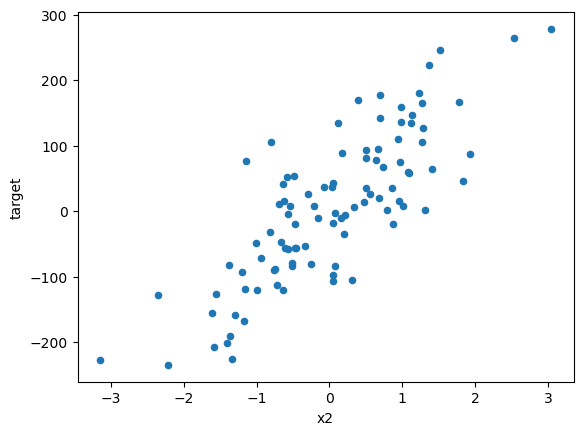

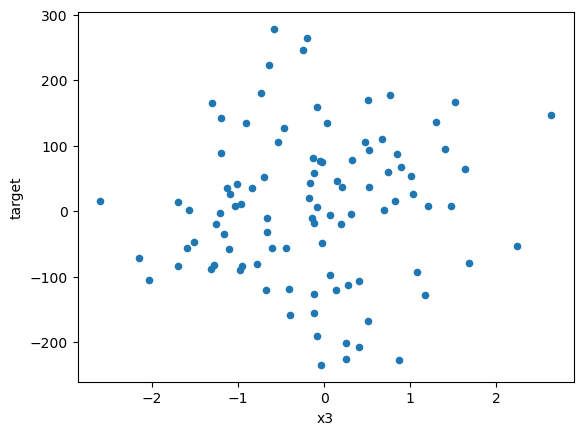

In [10]:
# 外れ値が除外されていることを散布図で確認

df3_3.plot(kind="scatter", x="x0", y="target")
df3_3.plot(kind="scatter", x="x1", y="target")
df3_3.plot(kind="scatter", x="x2", y="target")
df3_3.plot(kind="scatter", x="x3", y="target")

In [11]:
# 余計なdropはしていないことを確認

print(df2.info())
print(df3_3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    float64
 1   x1      100 non-null    float64
 2   x2      100 non-null    float64
 3   x3      100 non-null    float64
 4   target  100 non-null    float64
dtypes: float64(5)
memory usage: 8.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      97 non-null     float64
 1   x1      97 non-null     float64
 2   x2      97 non-null     float64
 3   x3      97 non-null     float64
 4   target  97 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB
None


In [12]:
df3 = df3_3

In [13]:
# 特徴量と正解データに分離

x = df3.loc[ : , "x0":"x3"]

t = df3["target"]

In [15]:
# 訓練データとテストデータに分割

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=1)

In [16]:
# 回帰モデルの作成

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [17]:
# 決定係数

model.score(x_test, y_test)

0.9641520028868885

In [18]:
# 平均絶対誤差

from sklearn.metrics import mean_absolute_error

pred = model.predict(x_test)

mean_absolute_error(y_pred=pred, y_true=y_test)

8.564348561278184